In [141]:
import pandas as pd
pd.__version__

'1.5.3'

In [142]:
dados = {'Estado':['SC','RJ','TO','BA','MG'], 'Ano':[2004,2005,2006,2007,2008],'Taxa Desemprego':[1.5, 1.7, 1.6, 2.4, 2.7]}

In [143]:
from pandas import DataFrame
df = DataFrame(dados)
df.head()

,Estado,Ano,Taxa Desemprego
0,SC,2004,1.5
1,RJ,2005,1.7
2,TO,2006,1.6
3,BA,2007,2.4
4,MG,2008,2.7


In [144]:
DataFrame(dados, columns= ['Estado', 'Taxa Desemprego', 'Ano'])

,Estado,Taxa Desemprego,Ano
0,SC,1.5,2004
1,RJ,1.7,2005
2,TO,1.6,2006
3,BA,2.4,2007
4,MG,2.7,2008


In [145]:
df2 = DataFrame(dados,
                columns= ['Estado', 'Taxa Desemprego', 'Taxa Crescimento', 'Ano'],
                index = ['estado1','estado2','estado3','estado4','estado5'])
df2

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,SC,1.5,NaN,2004
estado2,RJ,1.7,NaN,2005
estado3,TO,1.6,NaN,2006
estado4,BA,2.4,NaN,2007
estado5,MG,2.7,NaN,2008


In [146]:
df2.filter(items = ['estado4'], axis = 0)

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado4,BA,2.4,NaN,2007


In [147]:
df2.describe()

,Taxa Desemprego,Ano
count,5.000000,5.000000
mean,1.980000,2006.000000
std,0.535724,1.581139
min,1.500000,2004.000000
25%,1.600000,2005.000000
50%,1.700000,2006.000000
75%,2.400000,2007.000000
max,2.700000,2008.000000


In [148]:
df2.isna()

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,False,False,True,False
estado2,False,False,True,False
estado3,False,False,True,False
estado4,False,False,True,False
estado5,False,False,True,False


In [149]:
import numpy as np

df2['Taxa Crescimento'] = np.arange(5.)

df2

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,SC,1.5,0.0,2004
estado2,RJ,1.7,1.0,2005
estado3,TO,1.6,2.0,2006
estado4,BA,2.4,3.0,2007
estado5,MG,2.7,4.0,2008


In [150]:
df2['Taxa Crescimento'].isna()

estado1    False
estado2    False
estado3    False
estado4    False
estado5    False
Name: Taxa Crescimento, dtype: bool

In [151]:
df2.describe()

,Taxa Desemprego,Taxa Crescimento,Ano
count,5.000000,5.000000,5.000000
mean,1.980000,2.000000,2006.000000
std,0.535724,1.581139,1.581139
min,1.500000,0.000000,2004.000000
25%,1.600000,1.000000,2005.000000
50%,1.700000,2.000000,2006.000000
75%,2.400000,3.000000,2007.000000
max,2.700000,4.000000,2008.000000


In [152]:
df2['estado2':'estado4']

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado2,RJ,1.7,1.0,2005
estado3,TO,1.6,2.0,2006
estado4,BA,2.4,3.0,2007


In [153]:
df2[df2['Taxa Desemprego'] < 2]

,Estado,Taxa Desemprego,Taxa Crescimento,Ano
estado1,SC,1.5,0.0,2004
estado2,RJ,1.7,1.0,2005
estado3,TO,1.6,2.0,2006


In [154]:
df2[['Estado', 'Taxa Crescimento']]

,Estado,Taxa Crescimento
estado1,SC,0.0
estado2,RJ,1.0
estado3,TO,2.0
estado4,BA,3.0
estado5,MG,4.0


In [155]:
arq = pd.read_csv('dataset.csv')

In [156]:
arq.head(5)

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,NaN
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,NaN
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0


In [157]:
arq.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Regiao          0
ID_Produto      0
Categoria       0
Nome_Produto    0
Valor_Venda     0
Quantidade      2
dtype: int64

In [158]:
moda = arq['Quantidade'].value_counts().index[0]
print(moda)

3.0


In [159]:
arq.fillna({'Quantidade': moda}, inplace= True)

In [160]:
arq.isna().sum()

ID_Pedido       0
Data_Pedido     0
ID_Cliente      0
Segmento        0
Pais            0
Regiao          0
ID_Produto      0
Categoria       0
Nome_Produto    0
Valor_Venda     0
Quantidade      0
dtype: int64

In [161]:
arq.Valor_Venda.describe()

count     9994.000000
mean       229.858001
std        623.245101
min          0.444000
25%         17.280000
50%         54.490000
75%        209.940000
max      22638.480000
Name: Valor_Venda, dtype: float64

In [162]:
df3 = arq.query('229 < Valor_Venda < 10000')

In [163]:
df3.Valor_Venda.describe()

count    2357.000000
mean      766.679142
std       856.315136
min       229.544000
25%       323.100000
50%       490.320000
75%       859.200000
max      9892.740000
Name: Valor_Venda, dtype: float64

In [164]:
df3 = arq.query('Valor_Venda > 766')

In [165]:
df3.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
7,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,TEC-PH-10002275,Technology,Mitel 5320 IP Phone VoIP phone,907.1520,6.0
10,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-TA-10001539,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9.0
11,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,TEC-PH-10002033,Technology,Konftel 250 Conference phone - Charcoal black,911.4240,4.0
24,CA-2015-106320,2015-09-25,EB-13870,Consumer,United States,West,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,1044.6300,3.0


In [166]:
arq[arq['Quantidade'].isin([5,7,9,11])].shape

(2128, 11)

In [167]:
arq[arq['Quantidade'].isin([5,7,9,11])][:10]

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0
9,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,OFF-AP-10002892,Office Supplies,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5.0
10,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-TA-10001539,Furniture,Chromcraft Rectangular Conference Tables,1706.1840,9.0
14,US-2015-118983,2015-11-22,HP-14815,Home Office,United States,Central,OFF-AP-10002311,Office Supplies,Holmes Replacement Filter for HEPA Air Cleaner...,68.8100,5.0
21,CA-2016-137330,2016-12-09,KB-16585,Corporate,United States,Central,OFF-AR-10000246,Office Supplies,Newell 318,19.4600,7.0
22,CA-2016-137330,2016-12-09,KB-16585,Corporate,United States,Central,OFF-AP-10001492,Office Supplies,"Acco Six-Outlet Power Strip, 4' Cord Length",60.3400,7.0
27,US-2015-150630,2015-09-17,TB-21520,Consumer,United States,East,FUR-BO-10004834,Furniture,"Riverside Palais Royal Lawyers Bookcase, Royal...",3083.4300,7.0
35,CA-2016-117590,2016-12-08,GH-14485,Corporate,United States,Central,TEC-PH-10004977,Technology,GE 30524EE4,1097.5440,7.0
36,CA-2016-117590,2016-12-08,GH-14485,Corporate,United States,Central,FUR-FU-10003664,Furniture,"Electrix Architect's Clamp-On Swing Arm Lamp, ...",190.9200,5.0


In [168]:
#SELECT 'Segmento', 'Regiao', MEDIA('Valor_Venda') FROM ARQ GROUP BY 'Segmento', 'Regiao'
arq[['Segmento', 'Regiao', 'Valor_Venda']].groupby(['Regiao','Segmento']).mean()

Valor_Venda
Regiao  Segmento                
Central Consumer      207.946728
        Corporate     234.763466
        Home Office   208.248046
East    Consumer      238.875539
        Corporate     228.516929
        Home Office   253.911805
South   Consumer      233.390180
        Corporate     238.992025
        Home Office   272.996329
West    Consumer      217.033955
        Corporate     235.265911
        Home Office   239.442692

In [169]:
arq[['Segmento', 'Regiao', 'Valor_Venda']].groupby(['Regiao','Segmento']).agg(['mean','std','count'])

Valor_Venda                   
                           mean          std count
Regiao  Segmento                                  
Central Consumer     207.946728   587.906523  1212
        Corporate    234.763466   818.947521   673
        Home Office  208.248046   371.009180   438
East    Consumer     238.875539   633.371169  1469
        Corporate    228.516929   530.001654   877
        Home Office  253.911805   722.777318   502
South   Consumer     233.390180   559.346824   838
        Corporate    238.992025   586.176947   510
        Home Office  272.996329  1404.798466   272
West    Consumer     217.033955   551.997547  1672
        Corporate    235.265911   471.288764   960
        Home Office  239.442692   529.242737   571

In [170]:
arq[arq.Segmento.str.startswith('Con')].head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0
5,CA-2014-115812,2014-06-09,BH-11710,Consumer,United States,West,FUR-FU-10001487,Furniture,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0


In [171]:
arq[arq.Segmento.str.endswith('mer')].tail()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade
9989,CA-2014-110422,2014-01-21,TB-21400,Consumer,United States,South,FUR-FU-10001889,Furniture,Ultra Door Pull Handle,25.248,3.0
9990,CA-2017-121258,2017-02-26,DB-13060,Consumer,United States,West,FUR-FU-10000747,Furniture,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.960,2.0
9991,CA-2017-121258,2017-02-26,DB-13060,Consumer,United States,West,TEC-PH-10003645,Technology,Aastra 57i VoIP phone,258.576,2.0
9992,CA-2017-121258,2017-02-26,DB-13060,Consumer,United States,West,OFF-PA-10004041,Office Supplies,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.600,4.0
9993,CA-2017-119914,2017-05-04,CC-12220,Consumer,United States,West,OFF-AP-10002684,Office Supplies,"Acco 7-Outlet Masterpiece Power Center, Wihtou...",243.160,2.0


In [172]:
arq['ID_Pedido'].head()

0    CA-2016-152156
1    CA-2016-152156
2    CA-2016-138688
3    US-2015-108966
4    US-2015-108966
Name: ID_Pedido, dtype: object

In [173]:
arq['ID_Pedido'].str.split('-')

0       [CA, 2016, 152156]
1       [CA, 2016, 152156]
2       [CA, 2016, 138688]
3       [US, 2015, 108966]
4       [US, 2015, 108966]
               ...        
9989    [CA, 2014, 110422]
9990    [CA, 2017, 121258]
9991    [CA, 2017, 121258]
9992    [CA, 2017, 121258]
9993    [CA, 2017, 119914]
Name: ID_Pedido, Length: 9994, dtype: object

In [174]:
arq['ID_Pedido'].str.split('-').str[1].head()

0    2016
1    2016
2    2016
3    2015
4    2015
Name: ID_Pedido, dtype: object

In [175]:
arq['Ano'] = arq['ID_Pedido'].str.split('-').str[1]

In [176]:
arq.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano
0,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016
1,CA-2016-152156,2016-11-08,CG-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015


In [177]:
arq['Data_Pedido'].head()

0    2016-11-08
1    2016-11-08
2    2016-06-12
3    2015-10-11
4    2015-10-11
Name: Data_Pedido, dtype: object

In [178]:
arq['Data_Pedido'].str.lstrip('20')

0       16-11-08
1       16-11-08
2       16-06-12
3       15-10-11
4       15-10-11
          ...   
9989    14-01-21
9990    17-02-26
9991    17-02-26
9992    17-02-26
9993    17-05-04
Name: Data_Pedido, Length: 9994, dtype: object

In [179]:
arq['ID_Cliente'] = arq['ID_Cliente'].str.replace('CG', 'AX')

In [180]:
arq.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano
0,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016
1,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015


In [181]:
arq['Pedido_Segmento'] = arq['ID_Pedido'].str.cat(arq['Segmento'], sep = '-')

In [182]:
arq.head()

,ID_Pedido,Data_Pedido,ID_Cliente,Segmento,Pais,Regiao,ID_Produto,Categoria,Nome_Produto,Valor_Venda,Quantidade,Ano,Pedido_Segmento
0,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-BO-10001798,Furniture,Bush Somerset Collection Bookcase,261.9600,3.0,2016,CA-2016-152156-Consumer
1,CA-2016-152156,2016-11-08,AX-12520,Consumer,United States,South,FUR-CH-10000454,Furniture,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,2016,CA-2016-152156-Consumer
2,CA-2016-138688,2016-06-12,DV-13045,Corporate,United States,West,OFF-LA-10000240,Office Supplies,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,2016,CA-2016-138688-Corporate
3,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,FUR-TA-10000577,Furniture,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,2015,US-2015-108966-Consumer
4,US-2015-108966,2015-10-11,SO-20335,Consumer,United States,South,OFF-ST-10000760,Office Supplies,Eldon Fold 'N Roll Cart System,22.3680,2.0,2015,US-2015-108966-Consumer


In [183]:
import sklearn
sklearn.__version__

'1.2.1'

In [184]:
from sklearn.datasets import load_iris
data = load_iris()

In [186]:
import pandas as pd
df = pd.DataFrame(data['data'], columns = data['feature_names']) # type: ignore
df['species'] = data['target'] # type: ignore
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Axes: >

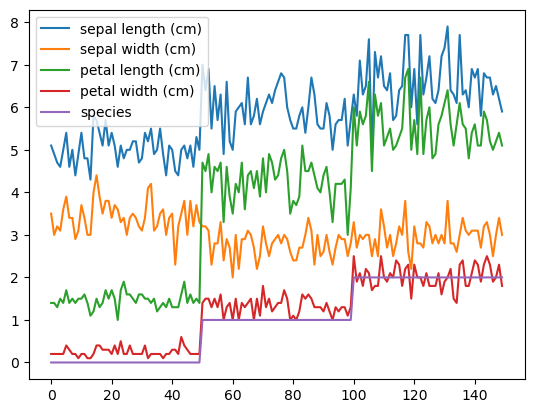

In [187]:
df.plot()

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

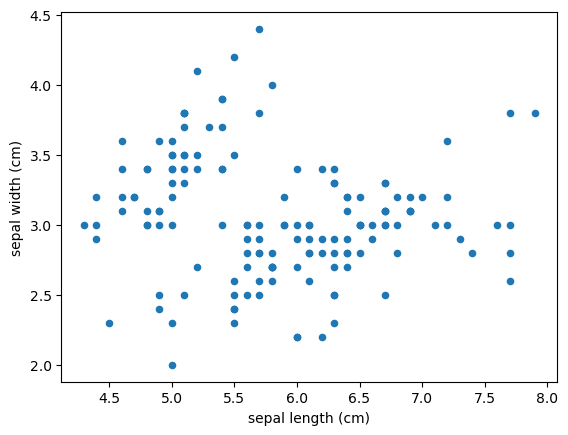

In [188]:
df.plot.scatter(x = 'sepal length (cm)', y = 'sepal width (cm)')

<Axes: xlabel='species'>

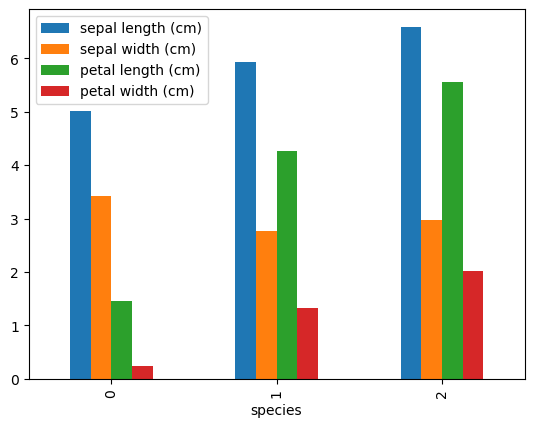

In [189]:
df.groupby('species').mean().plot.bar()